<a href="https://colab.research.google.com/github/Sheila-otuko/machine_learning_practice/blob/main/Market_segmentation_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
path = '/content/drive/MyDrive/3.12. Example.csv'
data = pd.read_csv(path)

In [7]:
data

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


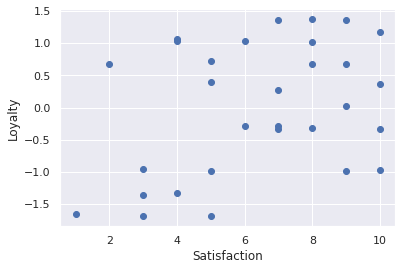

In [8]:
plt.scatter(data['Satisfaction'], data['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

Select the features

In [9]:
x = data.copy()


In [10]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(n_clusters=2)

clustering the results

In [11]:
clusters = x.copy()
clusters['cluster_pred'] = kmeans.fit_predict(x)


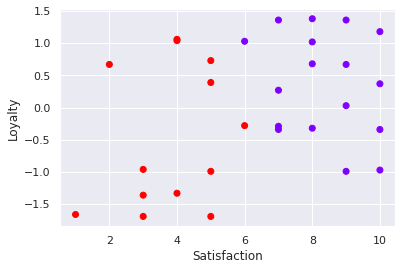

In [12]:
plt.scatter(clusters['Satisfaction'], clusters['Loyalty'], c=clusters['cluster_pred'], cmap= 'rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

standardize the variable "satisfaction"...the algorithm gave it preference over loyalty due to its high value

In [13]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)
x_scaled

#loyalty is already standardized...sklearn.preprocessing.scale() allows us to scale a particular value

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

the elbow method

In [14]:
wcss = []

for i in range(1, 10):
  kmeans = KMeans(i)
  kmeans.fit(x_scaled)
  wcss.append(kmeans.inertia_)

wcss

[59.999999999999986,
 29.818973034723143,
 17.913349527387968,
 10.247181805928422,
 7.792695153937187,
 6.645872908284241,
 5.326631124753925,
 4.395247193896115,
 3.7851748501515026]

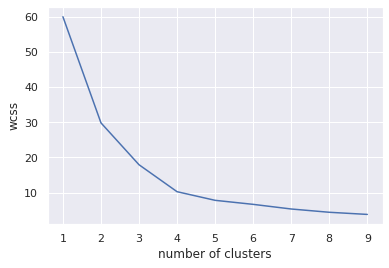

In [20]:
plt.plot(range(1,10), wcss)
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

exploring cluster solutions and selecting the number of clusters 

In [27]:
kmeans_new = KMeans(4)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)
clusters_new

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,2
1,6,-0.28,3
2,5,-0.99,2
3,7,-0.29,3
4,4,1.06,0
5,1,-1.66,2
6,10,-0.97,3
7,8,-0.32,3
8,8,1.02,1
9,8,0.68,1


Text(0, 0.5, 'Loyalty')

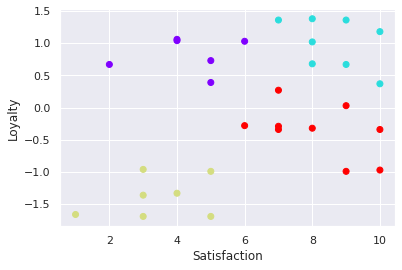

In [28]:
plt.scatter(clusters_new['Satisfaction'], clusters_new['Loyalty'], c=clusters_new['cluster_pred'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

**TYPES OF ANALYSIS**

*Exploratory*
-get acquanited with the data, search for patterns, plan. techniques include data visualization, descriptive and clustering

*Confirmatory and explanatory*
-work to explain a phenomenon, confirm a hypothesis and validate previous research e.g hypothesis testing and regression analysis


clustering is mostly used for exploratory analysis. 

**Types of clustering**

**FLAT**

K-means

**HIERARCHICAL**

Agglomerative(TOP-DOWN) - methods e.g kmeans. for examples categorising dinosaurs  

Divisive (BOTTOM-UP) - e.g pairing species until you meet the overall group (animals)




**DENDROGRAM**
**BOTTOM-UP)


tabular representation of features. you go on joining the features as you go through different levels. 

distance between link shows similarities and dissimilarities. 

**PROS OF HIERARCHICAL CLUSTERING**



1.   Shows all the possible linkages between clusters
2.   provides a better understanding of the data


3.   no need to preset the number of clusters like k-means
2.   many methods to perform


**CONS**
Scalability- cannot work for large data
computational power - large data slower computation speeds. this does not happen in k-means




